##Possible other projects to use##
https://github.com/HliasOuzounis/Ai-Guess-the-elo?tab=readme-ov-file

https://github.com/CSSLab/maia-Individual?tab=AGPL-3.0-1-ov-file

https://stockfishchess.org/download/

##Setup##

In [ ]:
!pip install chess
!pip install streamlit
#!pip install ngrok
!pip install pyngrok

# Stockfish installation
!wget https://github.com/official-stockfish/Stockfish/releases/latest/download/stockfish-ubuntu-x86-64-sse41-popcnt.tar
!tar -xvf stockfish-ubuntu-x86-64-sse41-popcnt.tar

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for chess: filename=chess-1.11.1-py3-none-any.whl size=148497 sha256=746c41dbd8d123532d2eaf02614e166066b46d1ef6493bb09a4880b92023d261
  Stored in directory: /root/.cache/pip/wheels/2e/2d/23/1bfc95db984ed3ecbf6764167dc7526d0ab521cf9a9852544e
Successfully built chess
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 2.8 MB/s eta 0:00:00
--2024-12-11 21:09:43--  https://github.com/official-stockfish/Stockfish/releases/latest/download/stockfish-ubuntu-x86-64-sse41-popcnt.tar
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awa

##Base Scoring Model##

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

tf.config.optimizer.set_jit(False)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Edward Lin/Notebooks/my_data.csv')

data['board'] = data['board'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' ').reshape(8, 8))
print(data['board'][0].shape)
data = data.dropna()

X = np.array([board for board in data['board']])
y = data['score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


(8, 8)
X_train shape: (10491, 8, 8)
X_test shape: (2623, 8, 8)
y_train shape: (10491,)
y_test shape: (2623,)


In [ ]:
#1D Arrays Only NN

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
#2D Arrays Only CNN

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(8, 8, 1)),
    tf.keras.layers.Conv2D(32, (4, 4), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [ ]:
history = model.fit(X_train, y_train, epochs=25, batch_size=16, validation_data=(X_test, y_test))

loss, mae = model.evaluate(X_test, y_test)
print(f'test Loss: {loss}, test MAE: {mae}')
model.save('model_evaluation.keras')

Epoch 1/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 134344.7500 - mae: 262.0475 - val_loss: 110330.6797 - val_mae: 239.9501
Epoch 2/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 107688.1719 - mae: 237.5211 - val_loss: 89216.2266 - val_mae: 215.3154
Epoch 3/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 88218.9375 - mae: 212.5736 - val_loss: 77547.6406 - val_mae: 198.2857
Epoch 4/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 73158.9766 - mae: 191.4240 - val_loss: 68980.6328 - val_mae: 183.9848
Epoch 5/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 62540.8398 - mae: 174.6453 - val_loss: 61140.5273 - val_mae: 174.2911
Epoch 6/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 52010.0859 - mae: 161.7424 - val_loss: 53831.8633 - val_mae: 162.9024
Epoch 7/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 43647.9492 - mae: 149.2271 - val_loss: 52083.7148 - val_mae: 162.3491
Epoch 8/25
656/656 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 37612.0195 - mae: 138.25

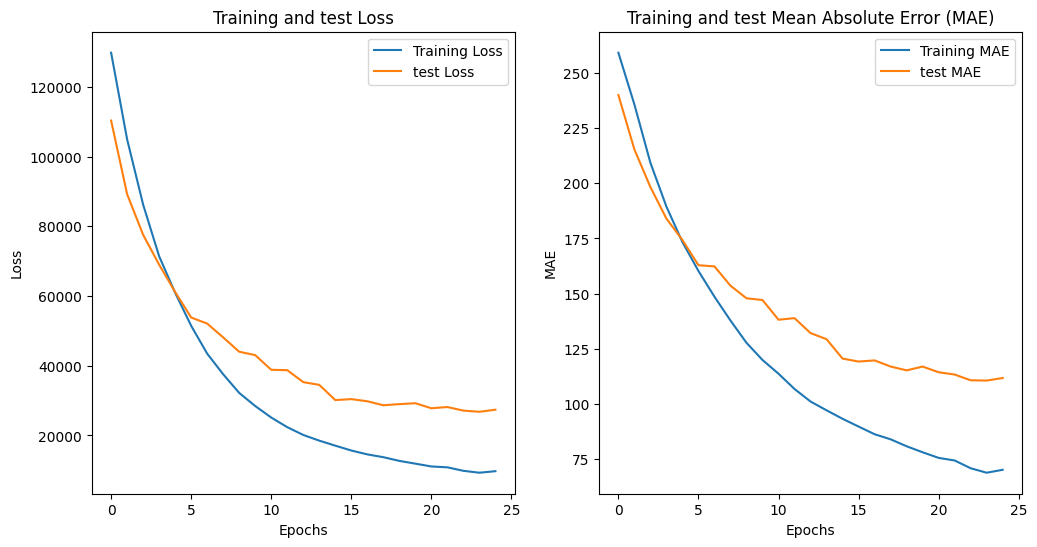

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='test Loss')
plt.title('Training and test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='test MAE')
plt.title('Training and test Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [ ]:
#print(data['board'][0].shape)
testPrediction = 0
data = pd.read_csv('/content/drive/MyDrive/Edward Lin/Notebooks/largeTrainingData.csv')
data['board'] = data['board'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' ').reshape(8, 8))
print(data['board'][testPrediction].shape)
input_data = np.expand_dims(data['board'][testPrediction], axis=0)
prediction = model.predict(input_data)
print(prediction, data['score'][testPrediction])

(8, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
[[16.596914]] 40.0


##Aggression Model##

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Edward Lin/Notebooks/my_data.csv')

data_cleaned = data.dropna(subset=['score'])
X = data_cleaned[['mobility_score', 'king_safety', 'pawn_structure']]
y_aggressiveness = data_cleaned['aggressive']

X_train, X_test, y_aggressiveness_train, y_aggressiveness_test = train_test_split(
    X, y_aggressiveness, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
modelAggression = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,)),

    # Hidden layers (Dense layers)
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
modelAggression.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/3
328/328 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9374 - loss: 0.4379 - val_accuracy: 0.9844 - val_loss: 0.1367
Epoch 2/3
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9900 - loss: 0.1016 - val_accuracy: 0.9989 - val_loss: 0.0310
Epoch 3/3
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9964 - loss: 0.0296 - val_accuracy: 0.9973 - val_loss: 0.0149


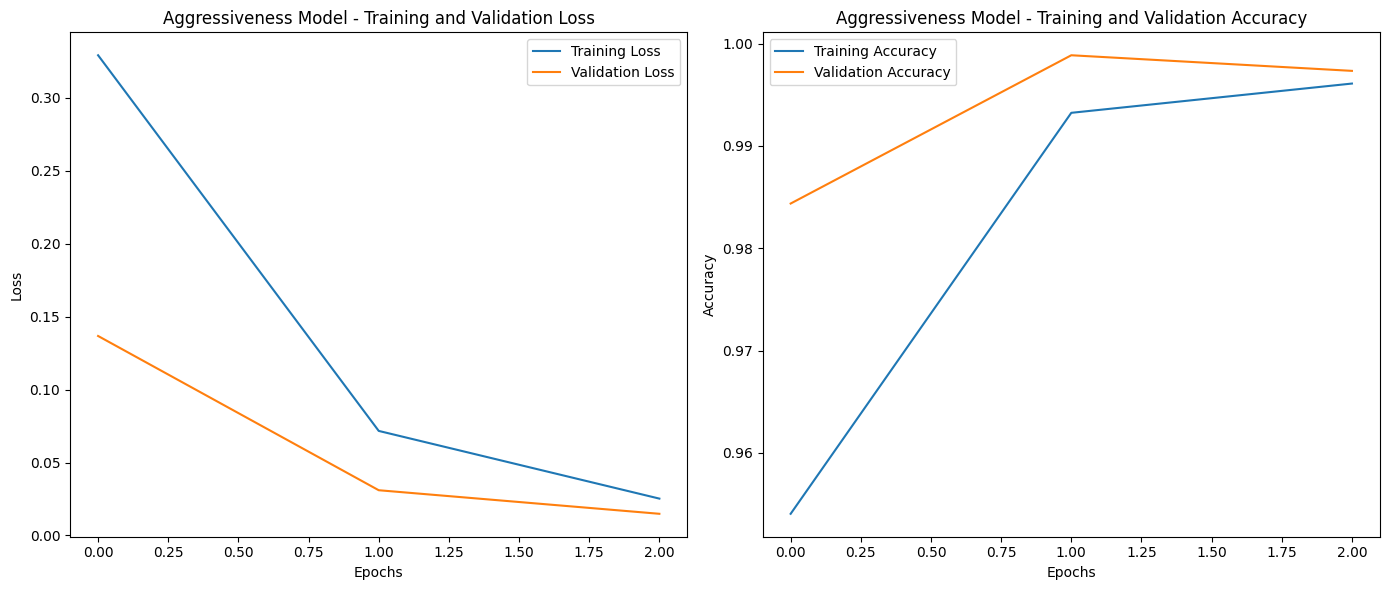

In [ ]:
historyAggressive = modelAggression.fit(
    X_train,
    y_aggressiveness_train,
    epochs=3,
    batch_size=32,
    validation_data=(X_test, y_aggressiveness_test)
)

plt.figure(figsize=(14, 6))

# Aggressiveness Model Graphs
plt.subplot(1, 2, 1)
plt.plot(historyAggressive.history['loss'], label='Training Loss')
plt.plot(historyAggressive.history['val_loss'], label='Validation Loss')
plt.title('Aggressiveness Model - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(historyAggressive.history['accuracy'], label='Training Accuracy')
plt.plot(historyAggressive.history['val_accuracy'], label='Validation Accuracy')
plt.title('Aggressiveness Model - Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

modelAggression.save('model_aggression.keras')

##Possible Moves##

In [ ]:
def refinedExtractFeatures(board):
    pieceActivity = 0
    kingSafety = 0
    pawnStructure = 0

    # Central squares (d4, d5, e4, e5)
    centerSquares = [(3, 3), (3, 4), (4, 3), (4, 4)]

    # Calculate piece activity: count pieces and their mobility
    mobilityScore = 0
    for i in range(8):
        for j in range(8):
            square = chess.square(i, j)  # Convert (i, j) to a square index
            piece = board.piece_at(square)  # Get the piece at the square
            if piece is not None:
                # Piece mobility: how many squares the piece can move to
                mobilityScore += pieceMobility(piece.piece_type, i, j, board)

    # Calculate king safety: Check how exposed the king is (open lines)
    kingSafety = kingExposure(board)

    # Calculate pawn structure: check pawn advancement and potential pawn breaks
    pawnStructure = pawnAdvanced(board)

    return mobilityScore, kingSafety, pawnStructure

# Helper function: Mobility score for pieces
def pieceMobility(pieceType, x, y, board):
    mobility = 0
    if pieceType == chess.PAWN:  # Pawn
        # Check for pawn advancement possibilities (simplified)
        mobility += 1 if x < 7 else 0
    elif pieceType == chess.KNIGHT:  # Knight
        moves = [(-2, -1), (-2, 1), (2, -1), (2, 1), (-1, -2), (-1, 2), (1, -2), (1, 2)]
        for move in moves:
            nx, ny = x + move[0], y + move[1]
            if 0 <= nx < 8 and 0 <= ny < 8:
                mobility += 1
    elif pieceType == chess.BISHOP:  # Bishop
        mobility += countDiagonalMoves(x, y, board)
    elif pieceType == chess.ROOK:  # Rook
        mobility += countStraightMoves(x, y, board)
    elif pieceType == chess.QUEEN:  # Queen
        mobility += countDiagonalMoves(x, y, board) + countStraightMoves(x, y, board)
    return mobility

# Helper function: Count how many squares a bishop can move to (diagonally)
def countDiagonalMoves(x, y, board):
    mobility = 0
    directions = [(-1, -1), (-1, 1), (1, -1), (1, 1)]
    for dx, dy in directions:
        nx, ny = x, y
        while 0 <= nx + dx < 8 and 0 <= ny + dy < 8:
            nx += dx
            ny += dy
            if board.piece_at(chess.square(nx, ny)) is not None:
                break
            mobility += 1
    return mobility

# Helper function: Count how many squares a rook can move to (straight lines)
def countStraightMoves(x, y, board):
    mobility = 0
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    for dx, dy in directions:
        nx, ny = x, y
        while 0 <= nx + dx < 8 and 0 <= ny + dy < 8:
            nx += dx
            ny += dy
            if board.piece_at(chess.square(nx, ny)) is not None:
                break
            mobility += 1
    return mobility

# Helper function: Measure how exposed the king is
def kingExposure(board):
    kingPosition = None
    # Find the king's position
    for i in range(8):
        for j in range(8):
            square = chess.square(i, j)
            if board.piece_at(square) == chess.KING:  # Assuming the king is represented by chess.KING
                kingPosition = (i, j)
                break
        if kingPosition:
            break
    exposure = 0
    if kingPosition:
        x, y = kingPosition
        exposure += countStraightMoves(x, y, board) + countDiagonalMoves(x, y, board)
    return exposure

def pawnAdvanced(board):
    advancedPawns = 0
    for i in range(8):
        for j in range(8):
            square = chess.square(i, j)
            piece = board.piece_at(square)
            if piece == chess.PAWN:  # Pawn
                if i >= 4:  # Pawns on the 5th rank or higher
                    advancedPawns += 1
    return advancedPawns

In [ ]:
def calculateFeatures(board):
    mobilityScore, kingSafety, pawnStructure = refinedExtractFeatures(board)
    return np.array([mobilityScore, kingSafety, pawnStructure]).reshape(1, -1)  # Return as 1x3 array for model

# Function to use the model for aggression prediction
def predictAggressiveness(features, modelAggression, threshold=0.5):
    aggressiveness_prob = modelAggression.predict(features)[0]  # Get the predicted probability (not binary)
    return 1 if aggressiveness_prob >= threshold else 0  # Classify as aggressive if above threshold

# Function to get the evaluation score from Stockfish
def getStockfishEvaluation(board, engine):
    info = engine.analyse(board, chess.engine.Limit(depth=20))
    return info['score'].relative.score(mate_score=10000)

In [ ]:
def getBoardAs2D(board):
    pieceMap = board.piece_map()
    board_2d = np.zeros((8, 8), dtype=int)
    for square, piece in pieceMap.items():
        row, col = divmod(square, 8)
        piece_type = piece.piece_type
        color_offset = 0 if piece.color == chess.WHITE else 6
        board_2d[row][col] = piece_type + color_offset
    return board_2d

In [ ]:
import chess
import chess.engine
import chess.pgn

engine = chess.engine.SimpleEngine.popen_uci("/content/stockfish/stockfish-ubuntu-x86-64-sse41-popcnt")

with open('/content/drive/MyDrive/Edward Lin/Notebooks/lichess_db_standard_rated_2013-01.pgn') as games:
    for i in range(100):
      game = chess.pgn.read_game(games)
      board = game.board()
      if board.turn == chess.BLACK:
        break

board = game.board()
move_ranking = {}

for move in board.legal_moves:
    if board.turn == chess.BLACK:
        board.push(move)
        features = calculateFeatures(board)
        aggressiveness = predictAggressiveness(features, modelAggression)
        evaluation = model.predict(getBoardAs2D(board).reshape(1, 8, 8, 1)).item()

        move_ranking[str(move)] = (evaluation, aggressiveness)
        board.pop()

print(move_ranking)


{}


##Streamlit App##

- A visual representation of the chess board for the user to interact with (give them move options on the side or something like that, button to submit move)
- Converting board state to 2d array for the model to use to decide next move
- History of moves
- Limit player to white

In [ ]:
!pip install pyngrok
from pyngrok import ngrok
!ngrok authtoken 2pMW0d1Yc16l8yH1cXLQl1wuEGE_6r4nP7Ff2jUKVaScTTbDP

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
def launch_website():
  print ("Click this link to try your web app:")
  public_url = ngrok.connect()
  print (public_url)
  !streamlit run --server.port 80 app.py >/dev/null

In [ ]:
%%writefile header.py
import streamlit as st

def create_header():
  st.title("Chess AI Model")
  st.header("Edward Lin")
  st.subheader("Play against a custom trained AI model")

Writing header.py


In [ ]:
%%writefile drawBoard.py
from PIL import Image, ImageDraw, ImageFont
import streamlit as st
import chess
import tensorflow as tf
import numpy as np
import chess.engine
import chess.pgn

modelAggression = tf.keras.models.load_model('/content/model_aggression.keras')
modelEvaluation = tf.keras.models.load_model('/content/model_evaluation.keras')

@st.cache_resource
def loadModels():
    modelAggression = tf.keras.models.load_model('/content/model_aggression.keras')
    modelEvaluation = tf.keras.models.load_model('/content/model_evaluation.keras')
    return modelAggression, modelEvaluation

def refinedExtractFeatures(board):
    pieceActivity = 0
    kingSafety = 0
    pawnStructure = 0

    centerSquares = [(3, 3), (3, 4), (4, 3), (4, 4)]  # Central squares

    mobilityScore = 0
    for i in range(8):
        for j in range(8):
            square = chess.square(i, j)
            piece = board.piece_at(square)
            if piece is not None:
                mobilityScore += pieceMobility(piece.piece_type, i, j, board)

    kingSafety = kingExposure(board)
    pawnStructure = pawnAdvanced(board)

    return mobilityScore, kingSafety, pawnStructure

def pieceMobility(pieceType, x, y, board):
    mobility = 0
    if pieceType == chess.PAWN:
        mobility += 1 if x < 7 else 0
    elif pieceType == chess.KNIGHT:
        moves = [(-2, -1), (-2, 1), (2, -1), (2, 1), (-1, -2), (-1, 2), (1, -2), (1, 2)]
        for move in moves:
            nx, ny = x + move[0], y + move[1]
            if 0 <= nx < 8 and 0 <= ny < 8:
                mobility += 1
    elif pieceType == chess.BISHOP:
        mobility += countDiagonalMoves(x, y, board)
    elif pieceType == chess.ROOK:
        mobility += countStraightMoves(x, y, board)
    elif pieceType == chess.QUEEN:
        mobility += countDiagonalMoves(x, y, board) + countStraightMoves(x, y, board)
    return mobility

def countDiagonalMoves(x, y, board):
    mobility = 0
    directions = [(-1, -1), (-1, 1), (1, -1), (1, 1)]
    for dx, dy in directions:
        nx, ny = x, y
        while 0 <= nx + dx < 8 and 0 <= ny + dy < 8:
            nx += dx
            ny += dy
            if board.piece_at(chess.square(nx, ny)) is not None:
                break
            mobility += 1
    return mobility

def countStraightMoves(x, y, board):
    mobility = 0
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    for dx, dy in directions:
        nx, ny = x, y
        while 0 <= nx + dx < 8 and 0 <= ny + dy < 8:
            nx += dx
            ny += dy
            if board.piece_at(chess.square(nx, ny)) is not None:
                break
            mobility += 1
    return mobility

def kingExposure(board):
    kingPosition = None
    for i in range(8):
        for j in range(8):
            square = chess.square(i, j)
            if board.piece_at(square) == chess.KING:
                kingPosition = (i, j)
                break
        if kingPosition:
            break
    exposure = 0
    if kingPosition:
        x, y = kingPosition
        exposure += countStraightMoves(x, y, board) + countDiagonalMoves(x, y, board)
    return exposure

def pawnAdvanced(board):
    advancedPawns = 0
    for i in range(8):
        for j in range(8):
            square = chess.square(i, j)
            piece = board.piece_at(square)
            if piece == chess.PAWN and i >= 4:
                advancedPawns += 1
    return advancedPawns

def calculateFeatures(board):
    mobilityScore, kingSafety, pawnStructure = refinedExtractFeatures(board)
    return np.array([mobilityScore, kingSafety, pawnStructure]).reshape(1, -1)

def predictAggressiveness(features, modelAggression, threshold=0.5):
    aggressivenessProb = modelAggression.predict(features)[0]
    return 1 if aggressivenessProb >= threshold else 0

def getStockfishEvaluation(board, engine):
    info = engine.analyse(board, chess.engine.Limit(depth=20))
    return info['score'].relative.score(mate_score=10000)

def getBoardAs2D(board):
    pieceMap = board.piece_map()
    board2D = np.zeros((8, 8), dtype=int)
    for square, piece in pieceMap.items():
        row, col = divmod(square, 8)
        pieceType = piece.piece_type
        colorOffset = 0 if piece.color == chess.WHITE else 6
        board2D[row][col] = pieceType + colorOffset
    return board2D

def createSquareWithPiece(squareColorPath, piecePath=None):
    squareImg = Image.open(squareColorPath).convert("RGBA")
    if piecePath:
        pieceImg = Image.open(piecePath).convert("RGBA")
        pieceImg = pieceImg.resize(squareImg.size, Image.Resampling.LANCZOS)
        squareImg.paste(pieceImg, (0, 0), pieceImg)
    return squareImg

def getPieceImage(pieceSymbol):
    pieceImages = {
        "P": "chessPieces/wP.png",
        "N": "chessPieces/wN.png",
        "B": "chessPieces/wB.png",
        "R": "chessPieces/wR.png",
        "Q": "chessPieces/wQ.png",
        "K": "chessPieces/wK.png",
        "p": "chessPieces/bP.png",
        "n": "chessPieces/bN.png",
        "b": "chessPieces/bB.png",
        "r": "chessPieces/bR.png",
        "q": "chessPieces/bQ.png",
        "k": "chessPieces/bK.png",
    }
    return f"/content/drive/MyDrive/Edward Lin/Notebooks/{pieceImages.get(pieceSymbol, '')}"

lightSquareColor = (240, 217, 181)
darkSquareColor = (181, 136, 99)
squareSize = 80

def createEmptyBoard(squareSize):
  boardSize = 8 * squareSize
  totalSize = boardSize + squareSize  # Adding space for labels
  boardImage = Image.new("RGBA", (totalSize, totalSize), (255, 255, 255, 0))

  draw = ImageDraw.Draw(boardImage)

  # Optional: Load a font for the labels
  try:
      font = ImageFont.truetype("arial.ttf", size=squareSize * 100)
  except IOError as e:
      font = ImageFont.load_default(size=squareSize//3)

  # Draw the board squares
  for row in range(8):
      for col in range(8):
          squareColor = lightSquareColor if (row + col) % 2 == 0 else darkSquareColor
          square = Image.new("RGBA", (squareSize, squareSize), squareColor)
          boardImage.paste(square, (squareSize + col * squareSize, squareSize + row * squareSize))

  # Add row labels (1 to 8 on the left side)
  for row in range(8):
      label = str(8 - row)
      textX = (squareSize - draw.textlength(label, font=font)) // 2
      textY = squareSize + row * squareSize + (squareSize - font.getbbox(label)[3]) // 2
      draw.text((textX, textY), label, fill="white", font=font)

  # Add column labels (A to H on the top side)
  for col in range(8):
      label = chr(ord('A') + col)
      textX = squareSize + col * squareSize + (squareSize - draw.textlength(label, font=font)) // 2
      textY = (squareSize - font.getbbox(label)[3]) // 2
      draw.text((textX, textY), label, fill="white", font=font)

  return boardImage


    # Draw labels (ranks and files)
    # draw = ImageDraw.Draw(board_image)
    # try:
    #     font = ImageFont.truetype("arial.ttf", size=int(squareSize * 0.3))
    # except IOError:
    #     font = ImageFont.load_default()

    # # Draw files (A-H) at the top and bottom
    # for col in range(8):
    #     label = chr(ord('A') + col)
    #     x = (col + 1) * squareSize + squareSize // 2
    #     y_top = squareSize // 4
    #     y_bottom = 8 * squareSize + squareSize // 4
    #     draw.text((x, y_top), label, fill="black", anchor="mm", font=font)
    #     draw.text((x, y_bottom), label, fill="black", anchor="mm", font=font)

    # # Draw ranks (1-8) on the left and right
    # for row in range(8):
    #     label = str(8 - row)
    #     x_left = squareSize // 4
    #     x_right = 8 * squareSize + squareSize // 4
    #     y = row * squareSize + squareSize // 2
    #     draw.text((x_left, y), label, fill="black", anchor="mm", font=font)
    #     draw.text((x_right, y), label, fill="black", anchor="mm", font=font)

def renderPieces(board, boardImage, squareSize):
    for row in range(8):
        for col in range(8):
            flippedRow = 7 - row
            squareIndex = flippedRow * 8 + col
            piece = board.piece_at(squareIndex)
            if piece:
                pieceImagePath = getPieceImage(piece.symbol())
                pieceImage = Image.open(pieceImagePath).convert("RGBA")
                pieceImage = pieceImage.resize((squareSize, squareSize), Image.Resampling.LANCZOS)
                boardImage.paste(pieceImage, (squareSize + col * squareSize, squareSize + row * squareSize), pieceImage)
    return boardImage


def translateMove(board, move):
    if isinstance(move, str):
        move = chess.Move.from_uci(move)

    startSquare = chess.square_name(move.from_square)
    endSquare = chess.square_name(move.to_square)

    piece = board.piece_at(move.from_square)
    pieceName = chess.piece_name(piece.piece_type).capitalize() if piece else "Unknown piece"

    return f"Move {pieceName} on {startSquare.upper()} to {endSquare.upper()}"

def aiMakeBlackMove(board):
    moveRanking = {}
    if board.turn == chess.BLACK:
        blackLegalMoves = list(board.legal_moves)
        for move in blackLegalMoves:
            board.push(move)
            features = calculateFeatures(board)
            aggressiveness = predictAggressiveness(features, modelAggression)
            evaluation = modelEvaluation.predict(getBoardAs2D(board).reshape(1, 8, 8, 1)).item()
            moveRanking[move.uci()] = (aggressiveness, evaluation)
            board.pop()

    if not moveRanking:
      st.session_state.ai_move = "AI has no legal moves. The game is over!"
      return None

    rankedMoves = sorted(moveRanking.items(), key=lambda x: (-x[1][0], x[1][1]))
    bestMoveUci = rankedMoves[0][0]
    st.session_state.ai_move = f"AI (Black) made the move: {translateMove(st.session_state.board, bestMoveUci)}"
    board.push(chess.Move.from_uci(bestMoveUci))
    return bestMoveUci

def drawBoard():
    loadModels()

    if "board" not in st.session_state:
        st.session_state.board = chess.Board()
    if "ai_move" not in st.session_state:
        st.session_state.ai_move = False

    def makeMove(move):
        try:
            st.session_state.board.push(chess.Move.from_uci(move))
        except ValueError:
            st.error("Invalid move. Please try again.")

    st.title("Interactive Chessboard")
    emptyBoard = createEmptyBoard(squareSize)
    chessboardImage = renderPieces(st.session_state.board, emptyBoard, squareSize)
    st.image(chessboardImage, use_container_width=True)

    st.header("Your Move (White)")
    legalMoves = list(st.session_state.board.legal_moves)
    moveOptions = [str(move) for move in legalMoves]

    if not legalMoves:
        st.write("No legal moves available!")
    else:
        st.write(st.session_state.ai_move)
        translatedMoves = [translateMove(st.session_state.board, chess.Move.from_uci(move)) for move in moveOptions]
        selectedMove = st.selectbox("Select a move:", options=translatedMoves, key="moveSelect")
        selectedMoveUci = moveOptions[translatedMoves.index(selectedMove)]

        if st.button("Make Move"):
            makeMove(selectedMoveUci)

            if not st.session_state.board.is_game_over() and st.session_state.board.turn == chess.BLACK:
                aiMoveUci = aiMakeBlackMove(st.session_state.board)
                # if aiMoveUci:
                #     st.session_state.ai_move = f"AI (Black) made the move: {translateMove(st.session_state.board, aiMoveUci)}"
                # else:
                #     st.session_state.ai_move = "AI has no legal moves. The game is over!"
            st.rerun()
    if st.button("Reset Game"):
        st.session_state.board = chess.Board()
        st.rerun()

Overwriting drawBoard.py


In [ ]:
%%writefile app.py
import streamlit as st
from header import *
from drawBoard import *

create_header()
drawBoard()

Overwriting app.py


In [ ]:
launch_website()

Click this link to try your web app:
NgrokTunnel: "https://8220-34-74-161-195.ngrok-free.app" -> "http://localhost:80"
2024-12-11 23:52:08.478 Uncaught exception GET /_stcore/stream (127.0.0.1)
HTTPServerRequest(protocol='http', host='8220-34-74-161-195.ngrok-free.app', method='GET', uri='/_stcore/stream', version='HTTP/1.1', remote_ip='127.0.0.1')
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tornado/websocket.py", line 937, in _accept_connection
    open_result = handler.open(*handler.open_args, **handler.open_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/streamlit/web/server/browser_websocket_handler.py", line 126, in open
    self._session_id = self._runtime.connect_session(
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/runtime.py", line 384, in connect_session
    session_id = self._session_mgr.connect_session(
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/websocket_session_manager.py", line 99,